<a href="https://colab.research.google.com/github/Tahir77778888/Teach-a-Taxi/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Image Classification with Convolutional Neural Networks

In [ ]:
# Import Libraries:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Prepare the Dataset
# For this example, we'll use the CIFAR-10 dataset which contains 60,000 32x32 color images in 10 classes

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Preprocess the Data:
# Normalize the pixel values to be between 0 and 1

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
# Convert Labels to Categorical:
# Convert class vectors to binary class matrices

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
# Define CIFAR-10 Labels
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
#  Build the CNN Model
# Define the Model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [ ]:
# Compile the Model:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the Model


In [ ]:
# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


In [ ]:
# Fit the Model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test))


Epoch 1/50
782/782 [==============================] - 110s 139ms/step - loss: 1.7491 - accuracy: 0.3537 - val_loss: 1.3855 - val_accuracy: 0.4945
Epoch 2/50
782/782 [==============================] - 96s 123ms/step - loss: 1.4618 - accuracy: 0.4705 - val_loss: 1.1841 - val_accuracy: 0.5717
Epoch 3/50
782/782 [==============================] - 97s 124ms/step - loss: 1.3295 - accuracy: 0.5271 - val_loss: 1.1122 - val_accuracy: 0.6033
Epoch 4/50
782/782 [==============================] - 91s 116ms/step - loss: 1.2392 - accuracy: 0.5642 - val_loss: 1.0671 - val_accuracy: 0.6227
Epoch 5/50
782/782 [==============================] - 92s 117ms/step - loss: 1.1768 - accuracy: 0.5851 - val_loss: 0.9726 - val_accuracy: 0.6625
Epoch 6/50
782/782 [==============================] - 99s 126ms/step - loss: 1.1239 - accuracy: 0.6068 - val_loss: 1.0115 - val_accuracy: 0.6480
Epoch 7/50
782/782 [==============================] - 90s 115ms/step - loss: 1.0807 - accuracy: 0.6224 - val_loss: 1.0357 - val_a

In [ ]:
#  Evaluate the Model
# Evaluate on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 3s - loss: 0.6379 - accuracy: 0.7879 - 3s/epoch - 11ms/step
Test accuracy: 0.7878999710083008


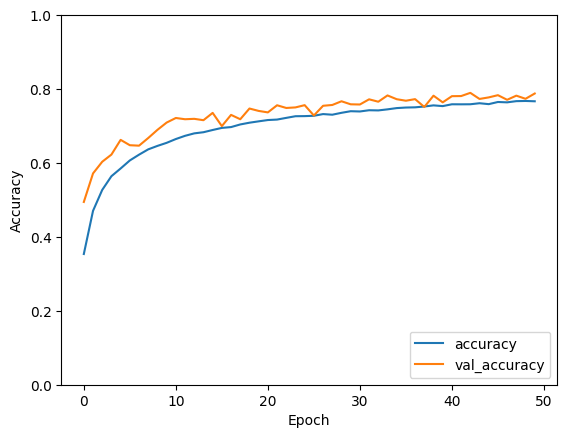

In [ ]:
# Visualize Results
# Plot Training History

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Predict on New Images
predictions = model.predict(x_test)


313/313 [==============================] - 10s 31ms/step


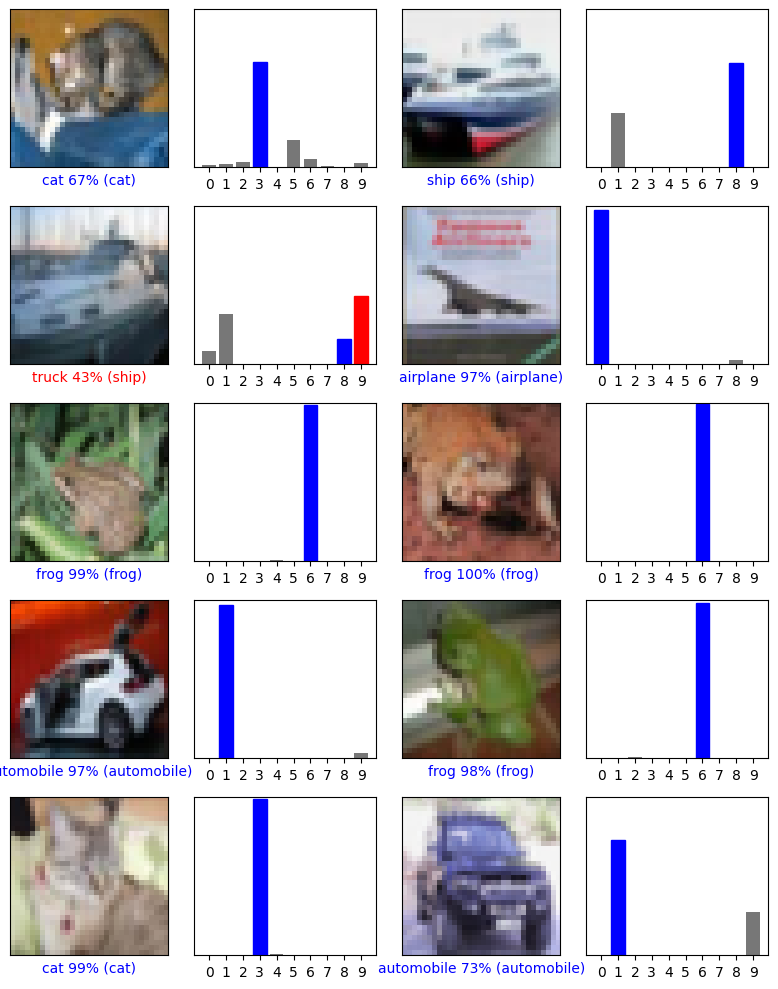

In [ ]:
# Plot some test images with their predicted labels.

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{cifar10_labels[predicted_label]} {100*np.max(predictions_array):2.0f}% ({cifar10_labels[np.argmax(true_label)]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

num_rows = 5
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test)
plt.tight_layout()
plt.show()


In [ ]:
# Save the Trained Model
model.save('cifar10_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
